In [2]:
import pandas as pd

df = pd.read_csv("developer_dataset.csv")

print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\3808710513.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("developer_dataset.csv")


Count number of data per column of df

In [4]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [9]:
round(df.describe())

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.0,111209.0,94793.0,91333.0,51089.0
mean,19262.0,2019.0,10.0,125178.0,41.0
std,11767.0,1.0,8.0,246122.0,14.0
min,1.0,2018.0,0.0,0.0,1.0
25%,9268.0,2018.0,4.0,46000.0,40.0
50%,18535.0,2019.0,8.0,79000.0,40.0
75%,28347.0,2019.0,14.0,120000.0,42.0
max,42857.0,2020.0,50.0,2000000.0,475.0


## Delete highly missing data

Obtain the percentage of missing data per column

In [10]:
maxRows = df['RespondentID'].count()

print("% of Missing Data:")
print((1 - df.count() / maxRows) * 100)

% of Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Drop column which percentage of missing data is above ~60% 

In [20]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis=1, inplace=True)

## Analyze developers by country

import libraries for graph representation and analysis

In [9]:
import seaborn as sns
import matplotlib as plt

### Remove missing data

Determine what kind of missing data there is for employment and developer type.

In [3]:
df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


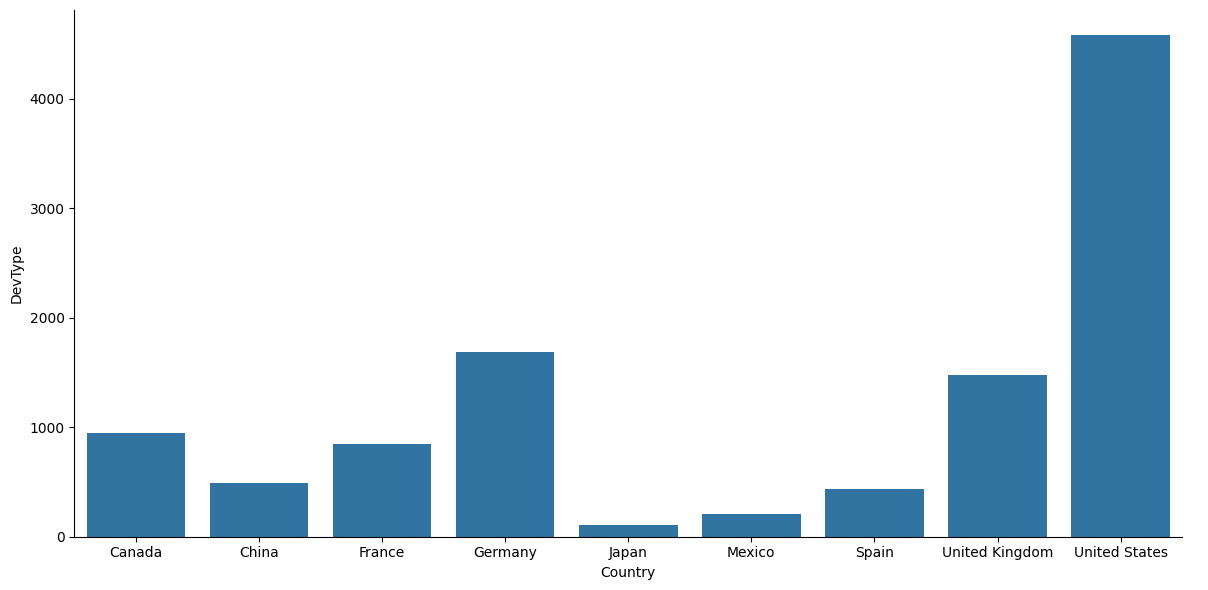

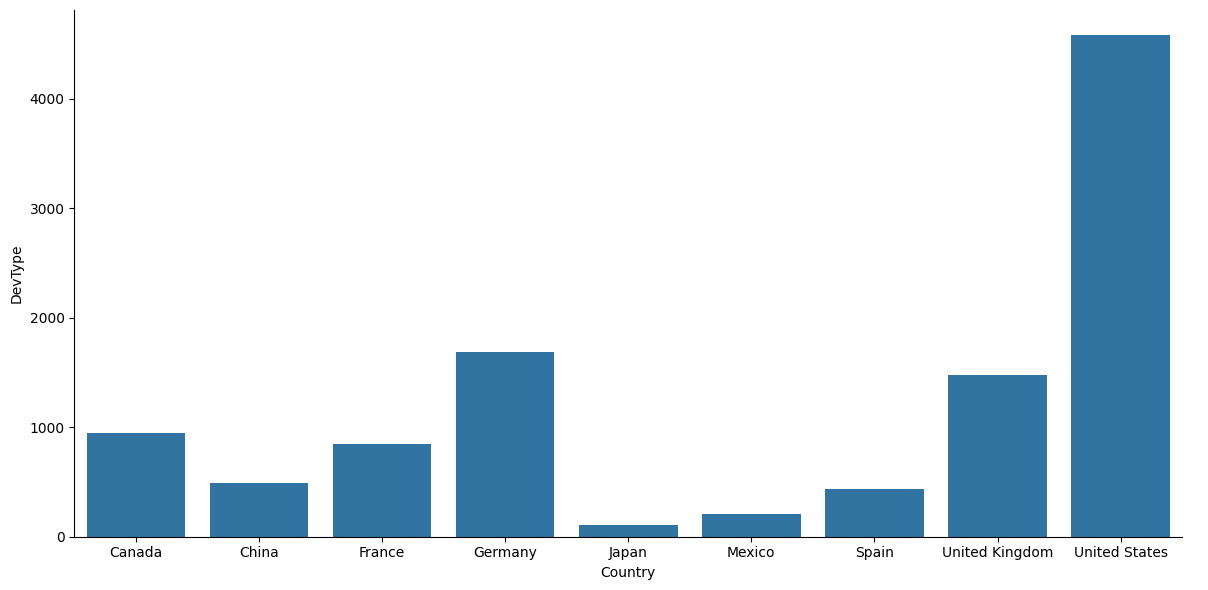

In [10]:
missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(
    data = missingData,
    kind = "bar",
    x = "Country",
    y = "DevType",
    height = 6,
    aspect = 2,
)

B = sns.catplot(
    data = missingData,
    kind = "bar",
    x = "Country",
    y = "DevType",
    height = 6,
    aspect = 2,
)

I determine that the type of missing data is MCAR and that it comprehends a low percentage of the total data. Making it safe to remove rows that contain missing data from the Employment and DevType columns.

In [11]:
# drop rows with missing data from the Employment and DevType columns
df.dropna(subset=['Employment', 'DevType'], inplace=True, how='any')

### Analyze the distribution of employment and developer types by country

Aggregate the employment data by key developer roles that align with major parts of the development lifecycle:

- Front-end
- Back-end
- Full-stack
- Mobile development
- Administration roles

C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\1388303526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\1388303526.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\1388303526.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

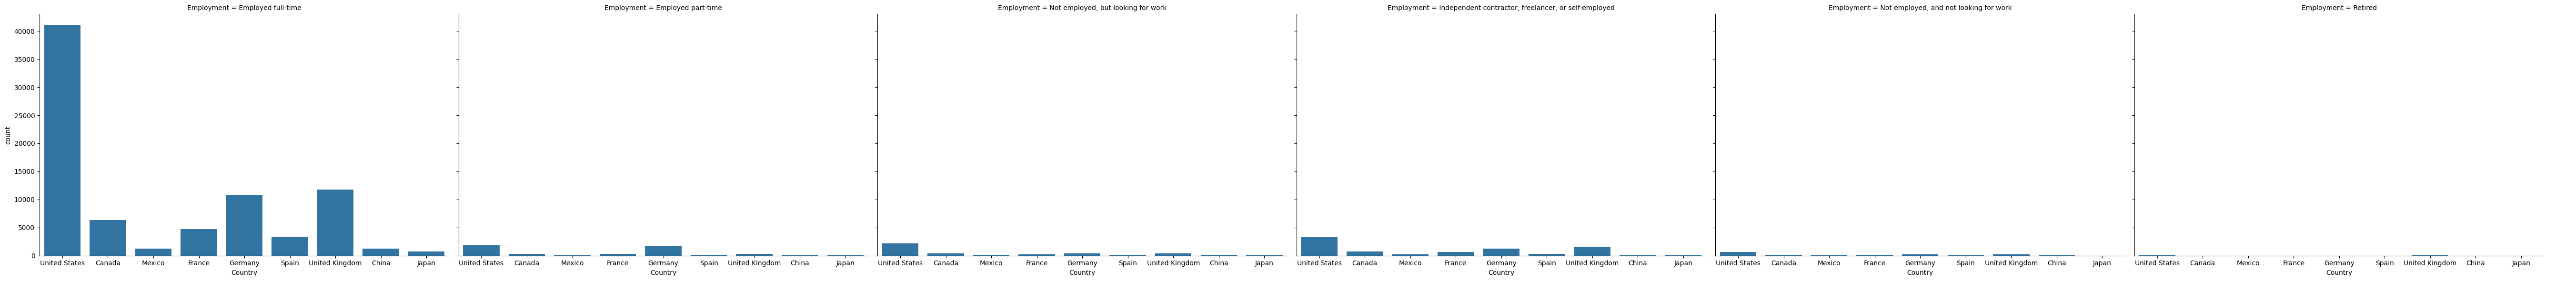

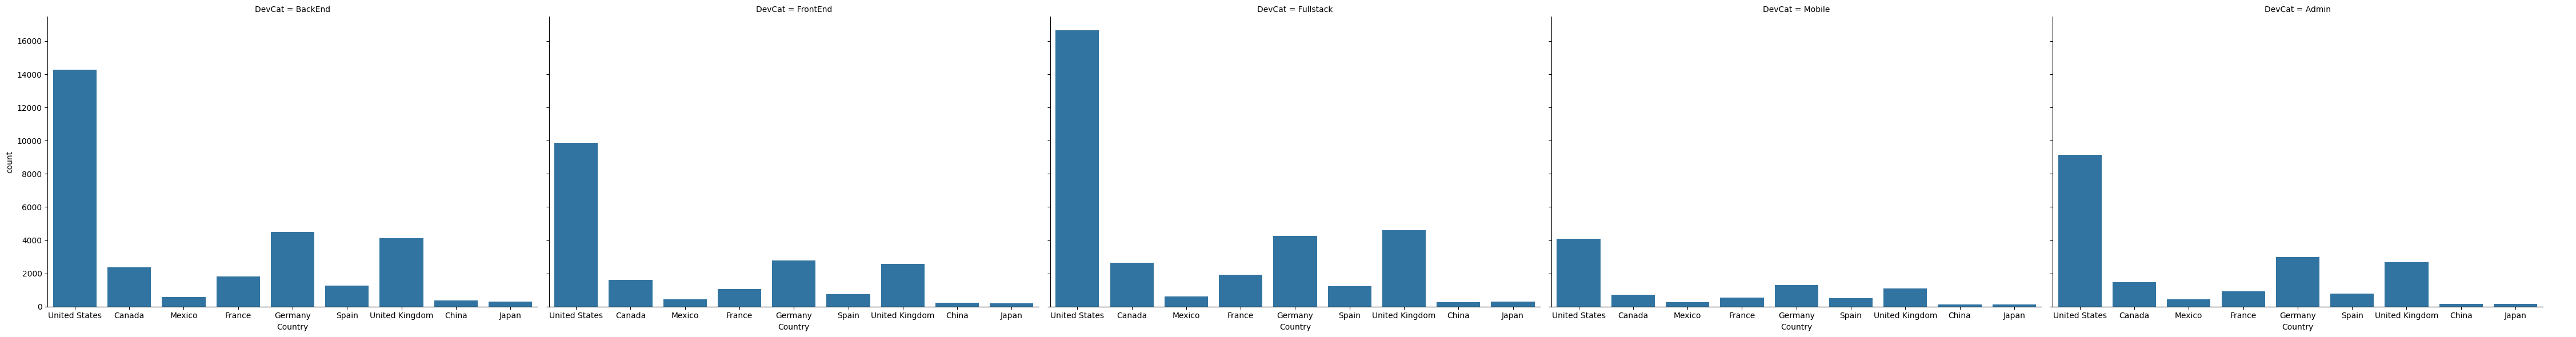

In [14]:
empfig =  sns.catplot(
    x="Country",
    col="Employment",
    data=df,
    kind="count",
    height=6,
    aspect=1.5,
)

# create subset DataFrame
devdf = df[['Country', 'DevType']]
# select a few of the key developer types outlined in the Stack Overflow survey
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'Fullstack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(
    id_vars = ['Country'],
    value_vars=['BackEnd', 'FrontEnd', 'Fullstack', 'Mobile', 'Admin'],
    var_name='DevCat',
    value_name='DevFlag',
)
# drop missing data
devdf.dropna(how='any', inplace=True)

defFig = sns.catplot(
    data=devdf,
    x='Country',
    col='DevCat',
    kind='count',
    height=6,
    aspect=1.5,
)

In conclusion to the above plots, the data indicates that the majority of the respondants are employed and that the developer roles that are more requested over time are BackEnd, FrontEnd and Fullstack.

## Investigate developer undergraduate majors

Obtain the count of missing data for the UndergradMajor column.

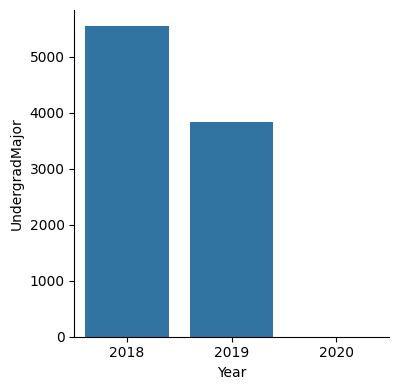

In [18]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(
    data=missingUndergrad,
    x="Year",
    y="UndergradMajor",
    kind="bar",
    height=4,
    aspect=1,
)

From the above plot, the data indicates that all the participants in 2020 had some level of decision for their undergrad major. For the purposes of the analysis, I'm most interested in what major a person ultimately landed on, as this would be the educational background they would carry into a job search. Carrying that value backwards for each participant to fill in any missing data will be useful.

In [21]:
# sort the information to carried backwards effectively
df = df.sort_values(['RespondentID','Year'])
# NOCB
df['UndergradMajor'].bfill(axis=0, inplace=True)

C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\3277962818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UndergradMajor'].bfill(axis=0, inplace=True)


analyze the major distribution for each year, using a vertical bar chart visualization

C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\3046105083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(axis=0, inplace=True)
C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\3046105083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\3046105083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

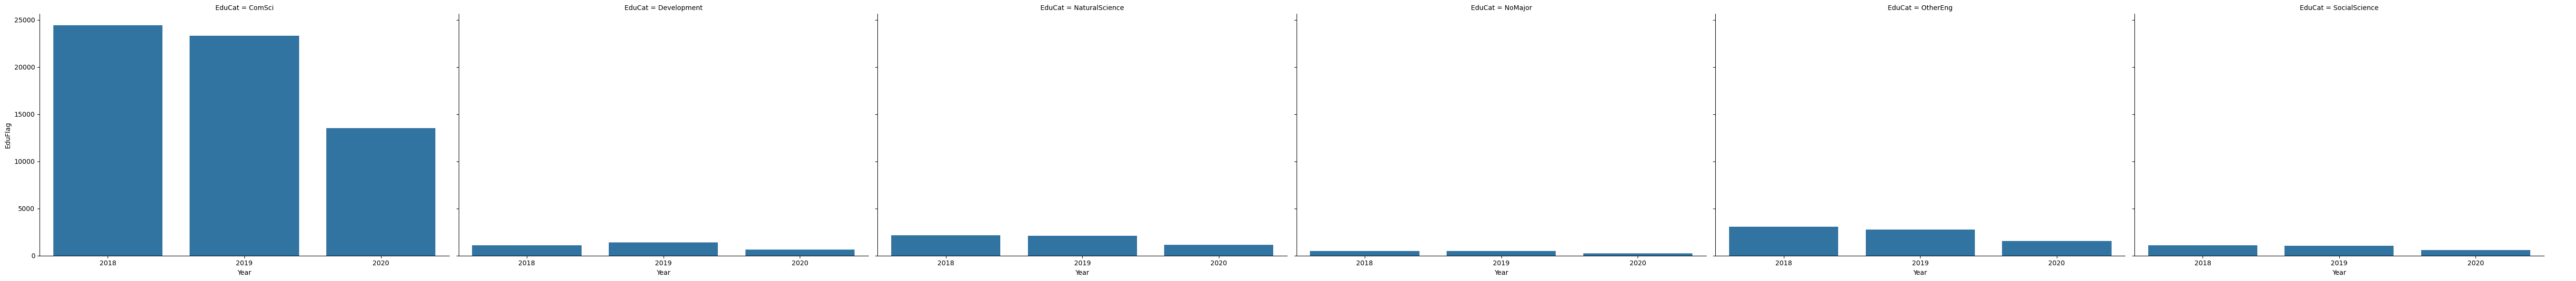

In [28]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year', 'UndergradMajor']]

# drop rows with missing values
edudf.dropna(axis=0, inplace=True)

# Obtain boolean series for each major category
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'Development'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

# unpivot the edudf
edudf = edudf.melt(
    id_vars=['Year'],
    value_vars=['SocialScience', 'NaturalScience', 'ComSci', 'Development', 'OtherEng', 'NoMajor'],
    var_name='EduCat',
    value_name='EduFlag'
)

edudf.dropna(axis=0, inplace=True)

edudf = edudf.groupby(['Year', 'EduCat']).sum().reset_index()

eduFig = sns.catplot(
    x='Year',
    y='EduFlag',
    col='EduCat',
    kind='bar',
    data=edudf,
    height=6,
    aspect=1.5,
)

The conclusion the plot expresses is that the vast majority of majors that enter the workforce for development roles, have some background in Computer Science. 

## Examine the relationship between years of experience and compensation

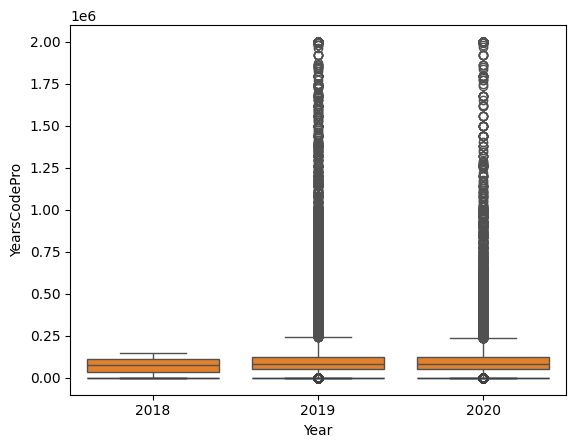

In [32]:
compFields = df[['Year', 'YearsCodePro', 'ConvertedComp']]

D = sns.boxplot(
    x='Year',
    y='YearsCodePro',
    data=compFields,
)

E = sns.boxplot(
    x='Year',
    y="ConvertedComp",
    data=compFields,
)

Filling the missing data with multiple imputation

In [33]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro', 'ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# create IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit model into test dataset
imp.fit(imputedf)

# transform model of the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro', 'ConvertedComp'])

This creates data points that are indicative of the overall trend of the data. This will facilitate the analysis of the relationship between YearsCodePro and ConvertedComp through the use of a boxplot

C:\Users\aeonr\AppData\Local\Temp\ipykernel_12168\33346158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

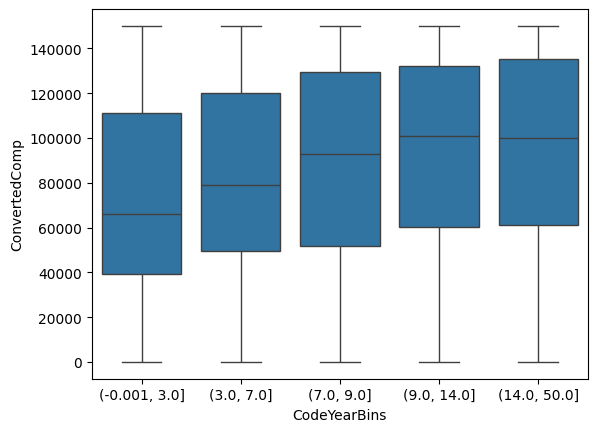

In [36]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(
    x='CodeYearBins',
    y='ConvertedComp',
    data=compPlotdf,
)

The plot validates that while there are high (and low) earning developers at every experience level, experience appears to correlate with compensation. The more experienced a developer was, the more (on average) they were compensated.